---
# Which Activation & Loss functions should be used in Binary Classification Problems?

**Objective**

In this tutorial, we will focus on how to select **Accuracy Metrics, Activation & Loss functions** in Classification Problems.

First, we will **review** the **types** of ***Classification Problems***, ***Activation & Loss functions***,  ***label encodings***, and **accuracy metrics**.

Furthermore, we will also discuss how the **target encoding** can affect the selection of Activation & Loss functions.

Moreover, we will talk about how to select **accuracy metric** correctly.

Then, for each type of classification problem, we will apply several Activation & Loss functions and observe their effects on **performance**.

We will experiment with all the concepts by designing and evaluating a deep learning model by using **Transfer Learning** on **horses and humans** dataset. 



In the end, we will summarize the experiment results.

The tutorial is devided into **three parts**. In this first part, we will focus on **Binary Classification**. In the upcoming parts, we will focus on multi-class classification and multi-label classification.

If you are ready, let's get started!


---
# Types of Classification Tasks

In general, there are three main types/categories for Classification Tasks in machine learning:

**A. binary classification** two target classes

**B. multi-class classification** more than two exclusive targets, only one class can be assigned to an input

**C. multi-label classification** more than two non exclusive targets,  one input can be labeled with multiple target classes.

We will see the details of each classification task along with an example dataset and Keras model below.





---
# Types of Label Encoding


In general, we can use different encodings for **true (actual) labels (y values)** : 
* **a floating number** (e.g. in binary classification: 1 or 0)
* **one-hot encoding** (e.g. in multi-class classification: [0 0 1 0 0])
* **a vector (array) of integers** (e.g. in multi-label classification: [14 225 3])

We will cover the all possible encodings in the following examples.

----
# Types of Activation Functions for Classification Tasks

In Keras, there are several [ Activation Functions](https://keras.io/api/layers/activations/). Below I summarize two of them:

* **Sigmoid or Logistic Activation Function:** Sigmoid function maps any input to an output ranging from **0 to 1**. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1. Sigmoid is equivalent to a 2-element Softmax, where **the second element is assumed to be zero**. **Therefore, sigmoid is mostly used for binary classification.**

Example: Assume the last layer of the model is as:

`outputs = keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x) `

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
# Let the last layer output vector be:
y_pred_logit = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype = tf.float32)
print("y_pred_logit:", y_pred_logit.numpy())
# and last layer activation function is sigmoid:
y_pred_prob = tf.keras.activations.sigmoid(y_pred_logit)
print("y_pred:", y_pred_prob.numpy())
print("sum of all the elements in y_pred: ",y_pred_prob.numpy().sum())

* **Softmax function :** Softmax converts a real vector to **a vector of categorical probabilities**. The elements of the output vector are in range (0, 1) and **sum to 1**. Each vector is handled independently. **Softmax is often used** as the activation for the last layer of a **classification** network because the result could be interpreted as a probability distribution. **Therefore, Softmax is mostly used for multi-class or multi-label classification.**

For example: Assume the last layer of the model is as:

`outputs = keras.layers.Dense(3, activation=tf.keras.activations.softmax)(x) `

In [ ]:
# Assume last layer output is as:
y_pred_logit = tf.constant([[-20, -1.0, 4.5], [0.0, 1.0, 20]], dtype = tf.float32)
print("y_pred_logit:\n", y_pred_logit.numpy())

# and last layer activation function is softmax:
y_pred_prob = tf.keras.activations.softmax(y_pred_logit)

print("y_pred:", y_pred_prob.numpy())
print("sum of all the elements in each vector in y_pred: ",
      y_pred_prob.numpy()[0].sum()," ", 
      y_pred_prob.numpy()[1].sum())


These two activation functions are the most used ones for classification tasks ***at the last layer***.

**PLEASE NOTE THAT**  If we **don't specify any activation** function at the last layer, no activation is applied to the outputs of the layer  (ie. **"linear" activation: a(x) = x).**

---
# Types of Loss Functions for Classification Tasks

In Keras, there are several [Loss Functions](https://keras.io/api/losses/probabilistic_losses/). Below, I summarized the ones used in **Classification** tasks:

* **BinaryCrossentropy:** Computes the cross-entropy loss between true labels and predicted labels. We use this cross-entropy loss **when there are only two label classes (assumed to be 0 and 1)**. For each example, there should be a **single floating-point value per prediction**.

* **CategoricalCrossentropy:** Computes the crossentropy loss between the labels and predictions. We use this crossentropy loss function **when there are two or more label classes.** We expect **labels to be provided in a one_hot representation**. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be # classes floating point values per feature.

* **SparseCategoricalCrossentropy:** Computes the crossentropy loss between the labels and predictions. We use this crossentropy loss function **when there are two or more label classes**. We expect **labels to be provided as integers**. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss. There should be # classes floating point values per feature for y_pred and a single floating point value per feature for y_true.



**IMPORTANT:** 
1. In Keras, **these three Cross-Entropy** functions expect two inputs: ***correct / true /actual labels*** (**y**) and ***predicted labels*** (**y_pred**):
  * As mentioned above, **correct (actual) labels** can be encoded ***floating numbers***, ***one-hot*** or ***array of integer*** values. 
  * However, the  **predicted labels** should be presented as a ***probability distribution***. 
  * If the  predicted labels are **not converted to a probability** distribution ***by the last layer*** of the model (using *sigmoid* or *softmax* activation functions), we **need to inform** these three Cross-Entropy functions by setting their **from_logits = True**. 

2. If the parameter **from_logits is set True** in any cross entropy function, then function expects ***ordinary*** numbers as **predicted label values** and apply apply **sigmoid transformation** on these predicted label values to convert them into a **probability distribution**. For details you can check the `tf.keras.backend.binary_crossentropy`  source code. Below code is taken from  TF source code:

  `if from_logits:
    return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)`


3. Both, **categorical cross entropy** and **sparse categorical cross entropy** have **the same loss function** which we have mentioned above. The **only difference** is the **format of the true labels**:
  * If ***correct (actual) labels*** are **one-hot** encoded, use **categorical_crossentropy**. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

  * But if ***correct (actual) labels*** are **integers**, use **sparse_categorical_crossentropy**. Examples for above 3-class classification problem: [1] , [2], [3]

  * The usage entirely depends on how **we load our dataset**. 
  * **One advantage of using sparse categorical cross entropy** is it saves storage in memory as well as time in computation because it simply uses a single integer for a class, rather than **a whole one-hot vector**.



I will explain the above concepts by designing models in **three** parts

---
# Types of Accuracy Metrics


Keras has [several accuracy metrics](https://keras.io/api/metrics/accuracy_metrics/). In classification, we can use 2 of them:

* **Accuracy**: Calculates how often predictions ***equal*** **labels**.

In [ ]:
y_true = [[1],    [1],   [0],    [0]]
y_pred = [[0.99], [1.0], [0.01], [0.0]]
print("Which predictions equal to labels:", np.equal(y_true, y_pred).reshape(-1,))
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)
print("Accuracy: ",m.result().numpy())

* **Binary Accuracy:** Calculates how often predictions ***match*** **binary labels**.

In [ ]:
y_true = [[1],    [1],    [0], [0]]
y_pred = [[0.49], [0.51], [0.5], [0.51]]
m = tf.keras.metrics.binary_accuracy(y_true, y_pred, threshold=0.5)
print("Which predictions match with binary labels:", m.numpy())

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_true, y_pred)
print("Binary Accuracy: ", m.result().numpy())

* **Categorical Accuracy:** Calculates how often predictions ***match*** **one-hot** labels.

In [ ]:
# assume 3 classes exist
y_true = [[  0,   0, 1],   [  0,     1, 0]]
y_pred = [[0.1, 0.9, 0.8], [0.05, 0.95, 0.3]]

m = tf.keras.metrics.categorical_accuracy(y_true, y_pred)
print("Which predictions match with one-hot labels:", m.numpy())
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_true, y_pred)
print("Categorical Accuracy:", m.result().numpy())

---
# Part A: Binary Classification (two target classes) 

For a binary classification task, I will use "**horses_or_humans**" dataset which is available in **TF Datasets**.

## A. 1. True (Actual) Labels are encoded with a **single floating number** (1./0.) 

### First let's load the data from [Tensorflow Datasets](https://www.tensorflow.org/datasets)

In [ ]:
ds_raw_train, ds_raw_test = tfds.load('horses_or_humans', 
                                      split=['train','test'], as_supervised=True)

In [ ]:
print("Number of samples in train : ", ds_raw_train.cardinality().numpy(),
      " in test : ",ds_raw_test.cardinality().numpy())

In [ ]:
def show_samples(dataset):
  fig=plt.figure(figsize=(14, 14))
  columns = 3
  rows = 3
  
  print(columns*rows,"samples from the dataset")
  i=1
  for a,b in dataset.take(columns*rows): 
    fig.add_subplot(rows, columns, i)
    plt.imshow(a)
    #plt.imshow(a.numpy())
    plt.title("image shape:"+ str(a.shape)+" Label:"+str(b.numpy()) )

    i=i+1
  plt.show()
show_samples(ds_raw_test)

**Notice that:**
* There are **only two label classes**: ***horse and humans***. 
* For each sample, there is a **single floating-point value per label:** (***0 --> horse, 1--> human***)



### Let's resize and scale the images so that we can save time in training

In [ ]:
#VGG16 expects min 32 x 32 
def resize_scale_image(image, label):
  image = tf.image.resize(image, [32, 32])
  image = image/255.0
  return image, label

In [ ]:
ds_train_resize_scale=ds_raw_train.map(resize_scale_image)
ds_test_resize_scale=ds_raw_test.map(resize_scale_image)
show_samples(ds_test_resize_scale)

### Prepare the data pipeline by setting batch size & buffer size using [tf.data](https://www.tensorflow.org/guide/data)

In [ ]:
batch_size = 64 

#buffer_size = ds_train_resize_scale.cardinality().numpy()/10
#ds_resize_scale_batched=ds_raw.repeat(3).shuffle(buffer_size=buffer_size).batch(64, )

ds_train_resize_scale_batched=ds_train_resize_scale.batch(64, drop_remainder=True )
ds_test_resize_scale_batched=ds_test_resize_scale.batch(64, drop_remainder=True )

print("Number of batches in train: ", ds_train_resize_scale_batched.cardinality().numpy())
print("Number of batches in test: ", ds_test_resize_scale_batched.cardinality().numpy())


### To train fast, let's use Transfer Learning by importing VGG16

In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3), # VGG16 expects min 32 x 32
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

### Create the classification model


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
initializer = tf.keras.initializers.GlorotUniform(seed=42)

activation =  None  # tf.keras.activations.sigmoid or softmax

outputs = keras.layers.Dense(1,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
model = keras.Model(inputs, outputs)

**Pay attention**:
* The last layer has only 1 unit. So the output (***y_pred***)  will be **a single floating point** as the true (actual) label (***y_true***).

* For the last layer, the activation function can be:
  * None 
  * sigmoid 
  * softmax
* When there is **no activation** function is used in the model's last layer, we need to set `from_logits=True` **in cross-entropy loss functions** as we discussed above. Thus, **cross-entropy loss functions** will apply a **sigmoid** transformation on **predicted label values**:

  `if from_logits: return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)`


### Compile the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.BinaryAccuracy()])

**IMPORTANT:** We need to use **keras.metrics.BinaryAccuracy()** for **measuring** **the** **accuracy** since it calculates how often predictions matches **binary labels**.


* As we mentioned above, Keras does ***not*** define a ***single*** accuracy metric, but ***several*** different ones, among them: `accuracy`, `binary_accuracy` and `categorical_accuracy`. 
* What happens under the hood is that, if you select ***mistakenly*** **categorical cross entropy as your loss function** in a **binary classification** and if you do ***not specify*** a particular accuracy metric by just writing
 
 `metrics="Accuracy"`

  Keras (***wrongly***...) **infers** that you are interested in the **categorical_accuracy**, and this is what it returns - while in fact you are interested in the **binary_accuracy** since our problem is a binary classification.

In summary; 
* to get `model.fit()` and `model.evaulate()` run correctly (without mixing the loss function and the classification problem at hand) we need to **specify the actual accuracy metric**!
* if the true (actual) labels are encoded binary (0./1.), you need to use **keras.metrics.BinaryAccuracy()** for **measuring** **the** **accuracy** since it calculates how often predictions matches **binary labels**.

### Try & See
Now, we can try and see the performance of the model by using **combination of activation  and loss functions.**

Each epoch takes almost 15 seconds on Colab TPU accelerator.

In [ ]:
model.fit(ds_train_resize_scale_batched, validation_data=ds_test_resize_scale_batched, epochs=20)

In [ ]:
model.evaluate(ds_test_resize_scale_batched)

---
## Obtained Results*:

| Activation | Loss | Accuracy |
| :- | -: | :-: |
| softmax | BinaryCrossentropy() | 0.5000
| **sigmoid** | **BinaryCrossentropy()** | **0.7266**
| **None** | **BinaryCrossentropy(from_logits=True)** | **0.8125**
| None | CategoricalCrossentropy(from_logits=True) | 0.5000
| sigmoid | CategoricalCrossentropy() |0.5000
| softmax | CategoricalCrossentropy() |0.5000
| any | SparseCategoricalCrossentropy() | InvalidArgumentError


   *When you run this notebook, most probably you would not get the exact numbers rather you would observe very similar values due to the stochastic nature of ANNs.* 

**Note that:**
* Generally, we use **softmax activation** instead of **sigmoid** with the **cross-entropy loss** because softmax activation distributes the probability throughout each output node.
* But, for **binary classification**, we use **sigmoid** rather than softmax. 
* The practical reason is that 
  * **softmax** is specially designed for **multi-class** and **multi-label** classification tasks.
  * **Sigmoid** is equivalent to a 2-element **Softmax**, where the second element is assumed to be zero. Therefore, **sigmoid** is mostly used for **binary classification**.
* The above results support this recommendation


**Why does BinaryCrossentropy loss functions with from_logits=True lead to good accuracy without any activation function?**

Because, using from_logits=True tells to the BinaryCrossentropy loss functions to apply its own **sigmoid** transformation over the inputs:

`if from_logits: return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)` 

[In Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy): "***Note - Using from_logits=True may be more numerically stable.***"


**In summary:**

We can **conclude** that, if the task is **binary classification** and true (actual) labels are encoded as a **single floating number** (0./1.) we have 2 options to go:
  * Option 1: activation = **sigmoid**  loss =**BinaryCrossentropy()** accuracy metric= **BinaryAccuracy()**
  * Option 2: activation = **None**  loss =**BinaryCrossentropy(from_logits=True)** accuracy metric= **BinaryAccuracy()**
             

## A. 2. True (Actual) Labels are one-hot encoded [1 0] or [0 1] 

Normally, in binary classification problems, we ***do not*** use one-hot encoding for **y_true** values. However, I would like to investigate the effects of doing so. In your real life applications, it is up to you how to encode your y_true. You can think of this section **as an experiment**.

### First convert the true (actual) label encoding to one-hot

In [ ]:
def one_hot(image, label):
  label = tf.one_hot(label, depth=2)
  return image, label

In [ ]:
ds_train_resize_scale_one_hot= ds_train_resize_scale.map(one_hot)
ds_test_resize_scale_one_hot= ds_test_resize_scale.map(one_hot)
show_samples(ds_test_resize_scale_one_hot)

**Notice that:**
* There are **only two label classes**: ***horses and humans***. 
* Labels are now **one-hot encoded** 

 **[1. 0.] --> horse,            
   [0. 1.]--> human**

### Prepare the data pipeline by setting batch size

In [ ]:
ds_train_resize_scale_one_hot_batched=ds_train_resize_scale_one_hot.batch(64)
ds_test_resize_scale_one_hot_batched=ds_test_resize_scale_one_hot.batch(64)

### Create the classification model


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

initializer = tf.keras.initializers.GlorotUniform(seed=42)
activation = None  #  tf.keras.activations.sigmoid or softmax

outputs = keras.layers.Dense(2,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
 
model = keras.Model(inputs, outputs)

**Pay attention**:
* The last layer has **now 2 units** instead of 1. Thus the output will support  **one-hot** encoding of the true (actual) label. Remember that one-hot vector has ***two floating point numbers*** in **binary** classification: [1. 0.] or [0. 1.]

* For the last layer, the activation function can be:
  * None 
  * sigmoid 
  * softmax
* When there is **no activation** function is used, we need to set `from_logits=True` **in cross-entropy functions** as we discussed above

### Compile the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.CategoricalAccuracy()])

**IMPORTANT:** We need to use **keras.metrics.CategoricalAccuracy()** for **measuring** **the** **accuracy** since it calculates how often predictions matches **one-hot labels**. **DO NOT USE** just `metrics=['accuracy']` as a performance metric! Because, as explained above [here in details](https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances):  


* Keras does not define a single accuracy metric, but several different ones, among them: `accuracy`, `binary_accuracy` and `categorical_accuracy`. 
* What happens under the hood is that, if you **mistakenly** select **binary cross entropy as your loss function** when **y_true** is encoded ***one-hot*** and do ***not specify*** a particular accuracy metric, instead, if you provide only:

  `metrics="Accuracy"`

  Keras (***wrongly***...) **infers** that you are interested in the **binary_accuracy**, and this is what it returns - while in fact you are interested in the **categorical_accuracy** (because of one-hot encoding!).

In summary, 
* to get `model.fit()` and  `model.evaulate()` run correctly (without mixing the loss function and the classification problem at hand) we need to **specify the actual accuracy metric**!
* if the true (actual) labels are encoded on-hot, you need to use **keras.metrics.CategoricalAccuracy()** for **measuring** **the** **accuracy** since it calculates how often predictions matches **one-hot labels**.

### Try & See
You can try and see the performance of the model by using **combination of activation  and loss functions.**


Each epoch takes almost 15 seconds on Colab TPU accelerator.

In [ ]:
model.fit(ds_train_resize_scale_one_hot_batched, validation_data=ds_test_resize_scale_one_hot_batched, epochs=20)

In [ ]:
model.evaluate(ds_test_resize_scale_one_hot_batched)

---
## Obtained Results*:


| Activation | Loss | Accuracy |
| :- | -: | :-: |
| softmax | BinaryCrossentropy() |0.6992
| **sigmoid** | **BinaryCrossentropy()** | **0.7148**
| **None** | **BinaryCrossentropy(from_logits=True)** | **0.7148**
| softmax  | CategoricalCrossentropy() | 0.6992
| sigmoid | CategoricalCrossentropy() | 0.6992
| None | CategoricalCrossentropy(from_logits=True) | 0.6992
| any | SparseCategoricalCrossentropy() | InvalidArgumentError

.
* When you run this notebook, most probably you would not get the exact numbers rather you would observe very similar values due to stochastic nature of ANNs.


**Why do Binary and Categorical cross-entropy loss functions lead to similar accuracy?**

I would like to remind you that when two loss functions are applied to the true labels that are encoded as **one-hot**, the calculated loss values are **very similar**. 
Thus, the model converges by using the loss function results and since both functions generate similar loss functions, the resulting trained models would have similar accuracy as seen above.

**Why do Sigmoid and Softmax activation functions lead to similar accuracy?**

* Since we use **one-hot** encoding in true label encoding, sigmoid generates two floating numbers changing from 0 to 1 but the sum of these two numbers do not necessarily  equal  1 (they are not probability distribution). 
* On the other hand, softmax generates two floating numbers changing from 0 to 1 but the sum of these two numbers exactly  equal to 1. 
* Normally, the  Binary and Categorical cross-entropy loss functions expect a probability distribution over the input values (when from_logit = False as default). 
* However, sigmoid activation function output is not a probability distribution over these two outputs.  
* Even so, the  Binary and Categorical cross-entropy loss functions can consume sigmoid outputs and generate similar loss values.

**Why 0.6992?**

I have run the models for 20 epochs starting with the same initial weights to isolate the initial weight effects on the performance. Here, 4 models achieve exact accuracy 0.6992 and the rest similarly achieve exact accuracy 0.7148. One reason might be it is only chance. Another reason could be if all the loss calculations end up with the same values so that the gradients are exactly the same. But it is not likely. I checked several times but the process seems to be correct. Please try yourself at home :))




According to the above experiment results, if the task is **binary classification** and true (actual) labels are encoded as a **one-hot**, we might have 2 options:
* Option A
  * activation = **None**
  * loss = **BinaryCrossentropy(from_logits=True)**
  * accuracy metric= **CategoricalAccuracy()**
* Option B
  * activation = **sigmoid** 
  * loss =**BinaryCrossentropy()** 
  * accuracy metric= **CategoricalAccuracy()**






# Binary Classification Summary

In a nut shel, in binary classification 
* we use floating numbers 0. or 1. to encode the class labels,
* BinaryAccuracy is the correct accuracy metric
* (Generally recomended) Last layer activation function is Sigmoid and loss function is BinaryCrossentropy.
* But we observed that Last layer activation function None and loss function is BinaryCrossentropy(from_logits=True) could also work.

So the summary of the experiments are below:

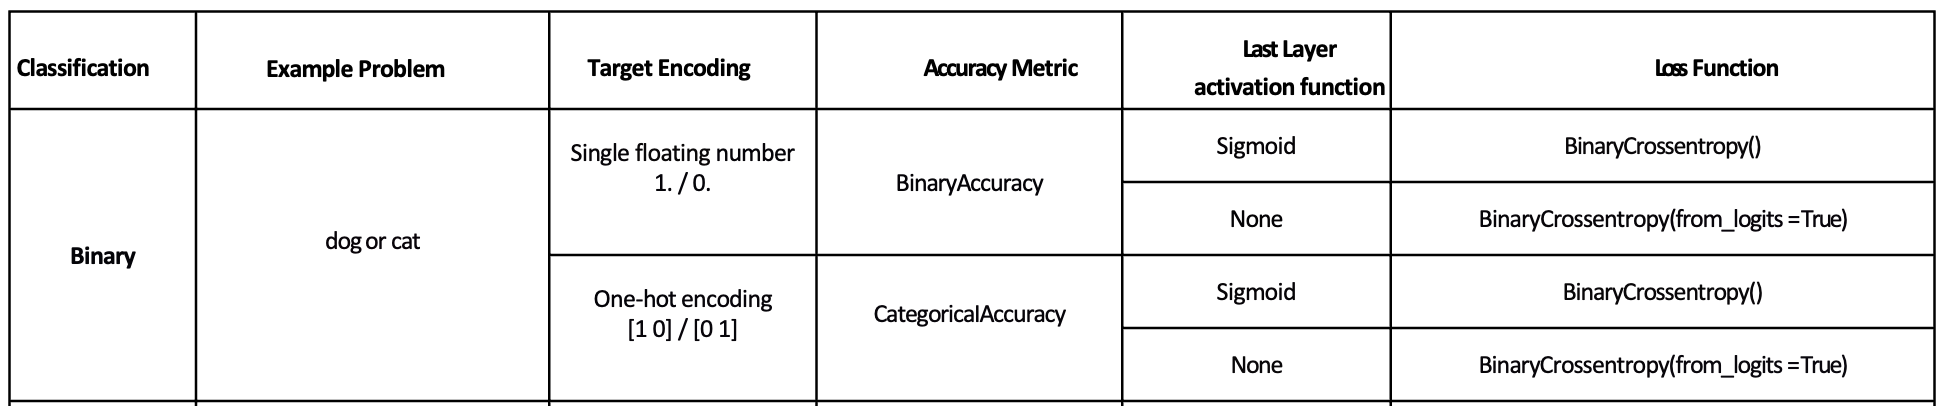

---
# References

[ Keras API reference / Losses / Probabilistic losses](https://keras.io/api/losses/probabilistic_losses/
) 

[Keras Activation Functions](https://keras.io/api/layers/activations/)

[Tensorflow Data pipeline (tf.data) guide](https://www.tensorflow.org/guide/data#using_tfdata_with_tfkeras)

[How does tensorflow sparsecategoricalcrossentropy work?](https://stackoverflow.com/questions/59787897/how-does-tensorflow-sparsecategoricalcrossentropy-work)


[Cross-entropy vs sparse-cross-entropy: when to use one over the other](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other)

[Why binary_crossentropy and categorical_crossentropy give different performances for the same problem?](https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances)

**Acknowledgement:** 
All credits go to [Professor Murat Karakaya](https://www.muratkarakaya.net) and his excellent contributions of this series of deep learning tutorials.
